In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


# Markdownの例

[参考1](http://qiita.com/Thermidor/items/b684cfabe0f2fde0c67b)<br>
[参考2](http://qiita.com/tbpgr/items/989c6badefff69377da7)

---

# hedding
## hedding
### hedding
abcd
----
### abcd ###
abcd

abcd**efg**hijk*lmn*opqr

* hoge
  * hoge
    * hogege

> inyo
> inyo
> inyo

inline program ` printf("hello-world")` hoge hoge

| Left | Center | Right | 
|:---|:---:|---:|
| 111 | 222 | 333 |
| e | f | g |

```python
def f(x):
    """a docstring"""
    return x**2
```

abcd

---
    
$$
\begin{align}
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
\end{align}
$$


# 関数の引数は値渡し？参照渡し？

[参考](http://rcmdnk.github.io/blog/2015/07/08/computer-python/)<br>
[参考２](http://qiita.com/urakarin/items/1d6e0e76bffb9297606e)

Pythonでは関数に値を渡す時にその**参照**が渡されます。

ですが、渡された関数内で変更されるとき、 渡した値自体が変更されるかどうかは 渡されたオブジェクトのタイプによります。

オブジェクトのタイプは**Immutable**(変更不可)と**Mutable**(変更可能)に分けられます。

Immutable: int, float, str, tuple 等
Mutable: list, set, dict 等
このうち、Mutableな値が関数に渡された場合、 中で変更すると値の変更が外にも反映されますが、 Immutableなものに関しては変更されません。

ただ、これもちょっと注意する必要があって、 listでもlist内の項目を変更したり値を追加したりするのではなく、 新たなlist自体を与える様な事をする場合は外では書き換えられません。

In [1]:
def fn(x=[1,2,3]):
    print 'fn: ', x, id(x)
    return x

x = fn()
print 'Default value', x, id(x)

x[0] = 4

y = fn()
print 'Not Default value', y, id(y)


fn:  [1, 2, 3] 49087072
Default value [1, 2, 3] 49087072
fn:  [4, 2, 3] 49087072
Not Default value [4, 2, 3] 49087072


# アンパック

# プロットのサンプル

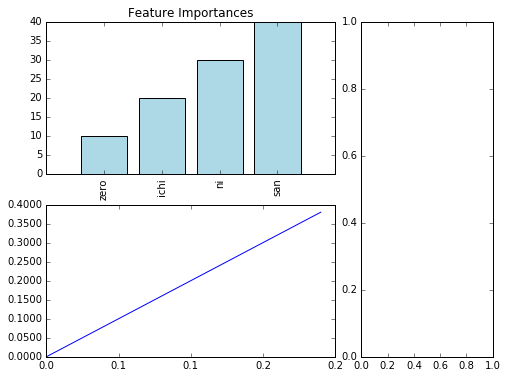

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.figure(figsize=[8,6])
G = gridspec.GridSpec(2,3)

###
plt.subplot(G[0,:2])
plt.title('Feature Importances')
plt.bar([0,1,2,3], [10,20,30,40], color='lightblue', align='center')
plt.xticks([0,1,2,3], ['zero','ichi','ni','san'], rotation=90)
plt.xlim([-1, 4])
#plt.tight_layout()

###
plt.subplot(G[1,:2])
plt.plot( np.arange(0,0.2,0.01), np.arange( 0,0.4,0.02)  )
ax = plt.gca()
ax.xaxis.set_major_formatter( FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter( FormatStrFormatter('%0.4f'))

###
plt.subplot(G[:,2])

plt.show()

## ボタン等のつけ方
[参考](http://myenigma.hatenablog.com/entry/2015/08/30/223559)

# Waveファイルの扱い
[参考1](http://yukara-13.hatenablog.com/entry/2013/11/09/103848)<br>
[参考2](http://qiita.com/yu_tailsfox/items/86380a0d4d016e1634f1)<br>
[参考3](https://docs.scipy.org/doc/scipy-0.18.1/reference/io.html)

In [13]:
# -*- coding: utf-8 -*-
#from scipy.io.wavfile import read as siw
import scipy.io.wavfile as siw

#wavfile = "./test.wav"
wavfile = "../pydub/test/data/test1.wav"

fs, data = siw.read(wavfile)

print "Sampling rate :", fs

if (data.shape[1] == 2):
    left = data[:, 0]
    right = data[:, 1]

siw.write( "test_out.wav",  fs, data )

Sampling rate : 32000


# 連立方程式を解く
[参考１](http://myenigma.hatenablog.com/entry/2015/11/21/222755#連立方程式を解く)

# 改行なしで文字列を出力したい
[参考](http://www.lifewithpython.com/2013/12/python-print-without-.html)<br>
ひとつめは print string, を使う方法です。


In [1]:
print "hello",
print "hello",
print "hello"

hello hello hello


もうひとつは sys.stdout.write() を使う方法です。

In [2]:
import sys
sys.stdout.write("hello")
sys.stdout.write("hello")
sys.stdout.write("hello")

hellohellohello

Python3で改行を入れてほしくない場合は次のようにするとよいようです。

In [5]:
# case in Python 3
print("hello", end="")
print("hello", end="")

hellohello

ちなみに、Python2.6以降であれば、次の一文を宣言すると、 print 文を上書きする形でPython3の print 関数を使うことができるようになります。

In [6]:
# case in Python 2.6~
from __future__ import print_function
print("hello", end="")
print("hello", end="")

hellohello

## numpy.bincount()
配列に含まれている０と１の数を数えるのに便利

In [4]:
a = [0, 1, 0, 1, 1, 0, 0]
np.bincount(a)

array([4, 3])